# Quick forest plots

### Setup with example data

In [122]:
import pandas as pd
sys.path.insert(0, os.path.join(os.path.expanduser('~'), 'forestplot'))
from forestplot.forest import forest_plot
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [129]:
# reading, subset and sort by disorder/sample size
df = pd.read_csv('../data/bracher_smith_et_al_2020.csv')
df = df.sort_values(['Disorder', 'Sample Size'], ascending=[False, True])
df = df[df['Method'] == 'ML']

### Basic forest plot

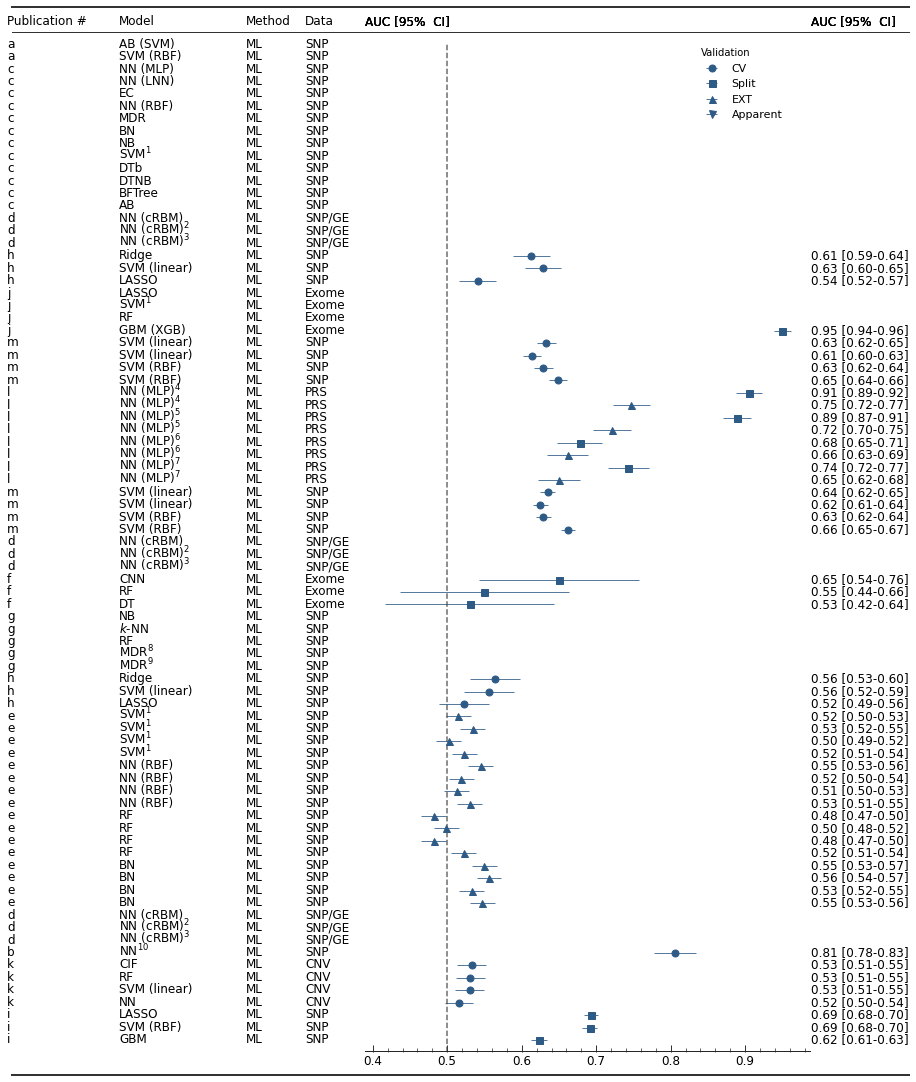

In [141]:
# specify columns for annotation, AUC, SE and different marker types if wanted
annot = ['Publication #', 'Model', 'Method', 'Data', 'AUC']
fig, ax = forest_plot(df, to_annotate=annot, auc_col='AUC', se_col='AUC_se',
                      subset_col='Validation', add_legend=True)

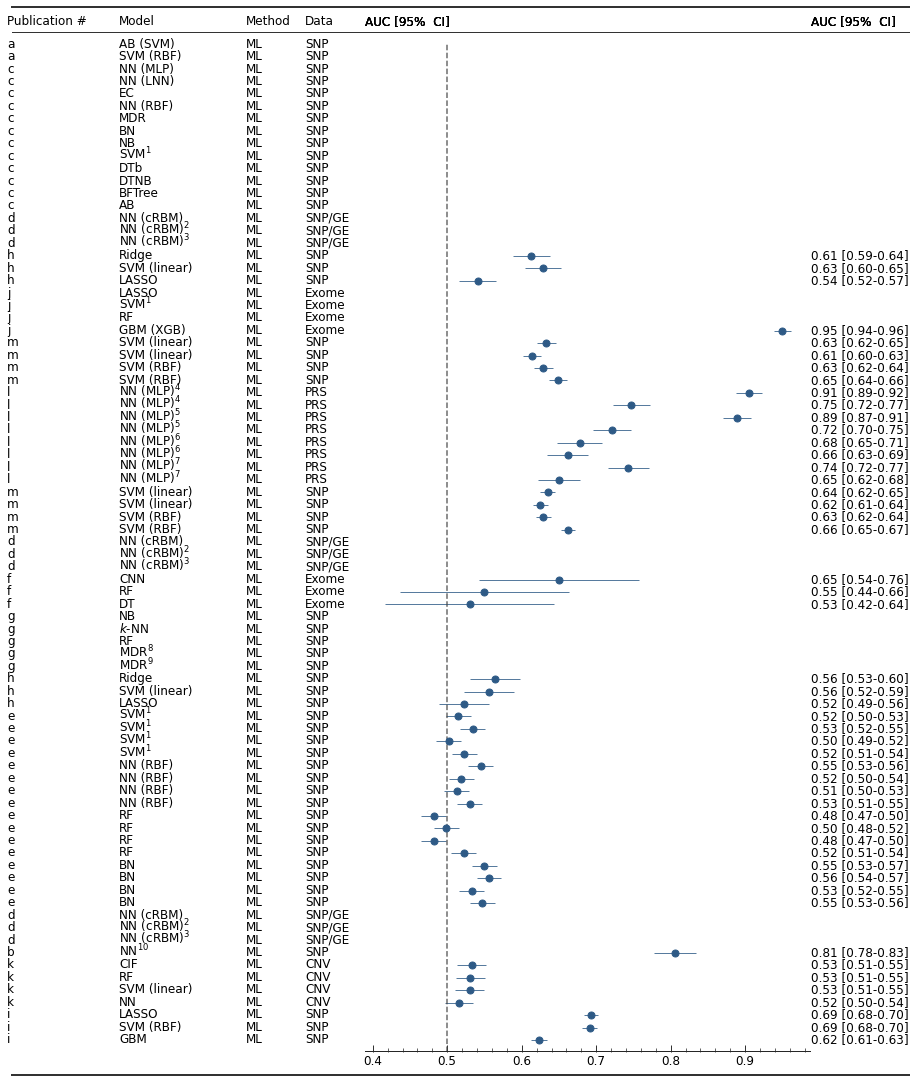

In [144]:
# same plot with single marker type, and no legend needed
annot = ['Publication #', 'Model', 'Method', 'Data', 'AUC']
fig, ax = forest_plot(df, to_annotate=annot, auc_col='AUC', se_col='AUC_se',
                      add_legend=False)

### Customising forest plots

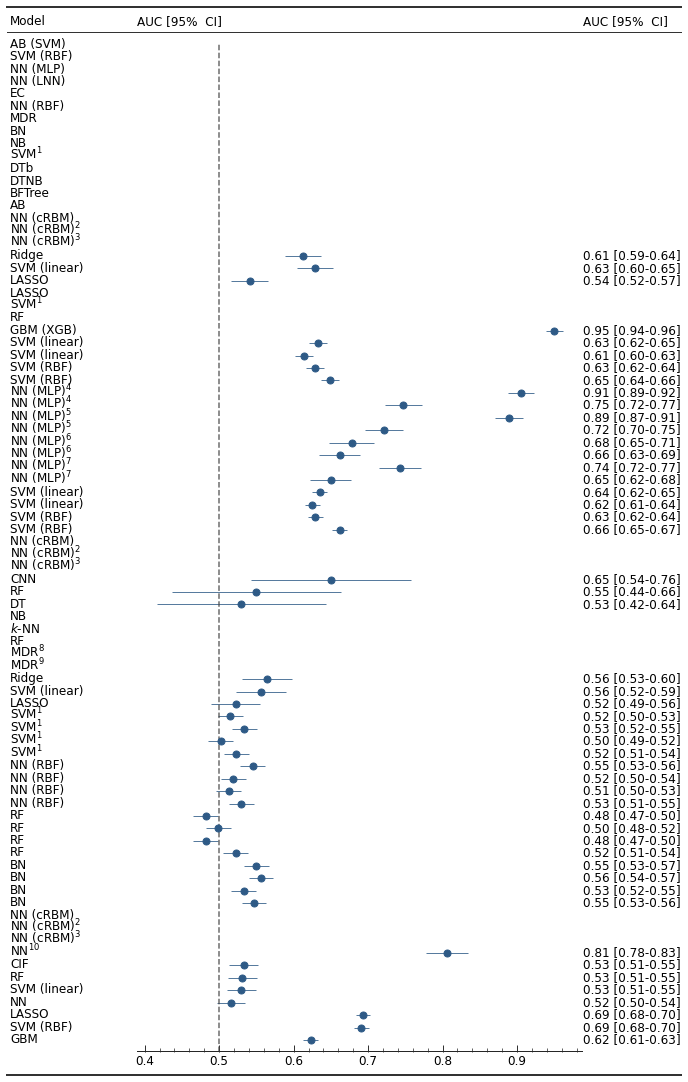

In [152]:
# smaller plot with manually specified x-axis limits for table header/tail lines
annot = ['Model', 'AUC']
fig, ax = forest_plot(df, to_annotate=annot, auc_col='AUC', se_col='AUC_se',
                      add_legend=False, hbar_lim=(-0.29, 1.22))

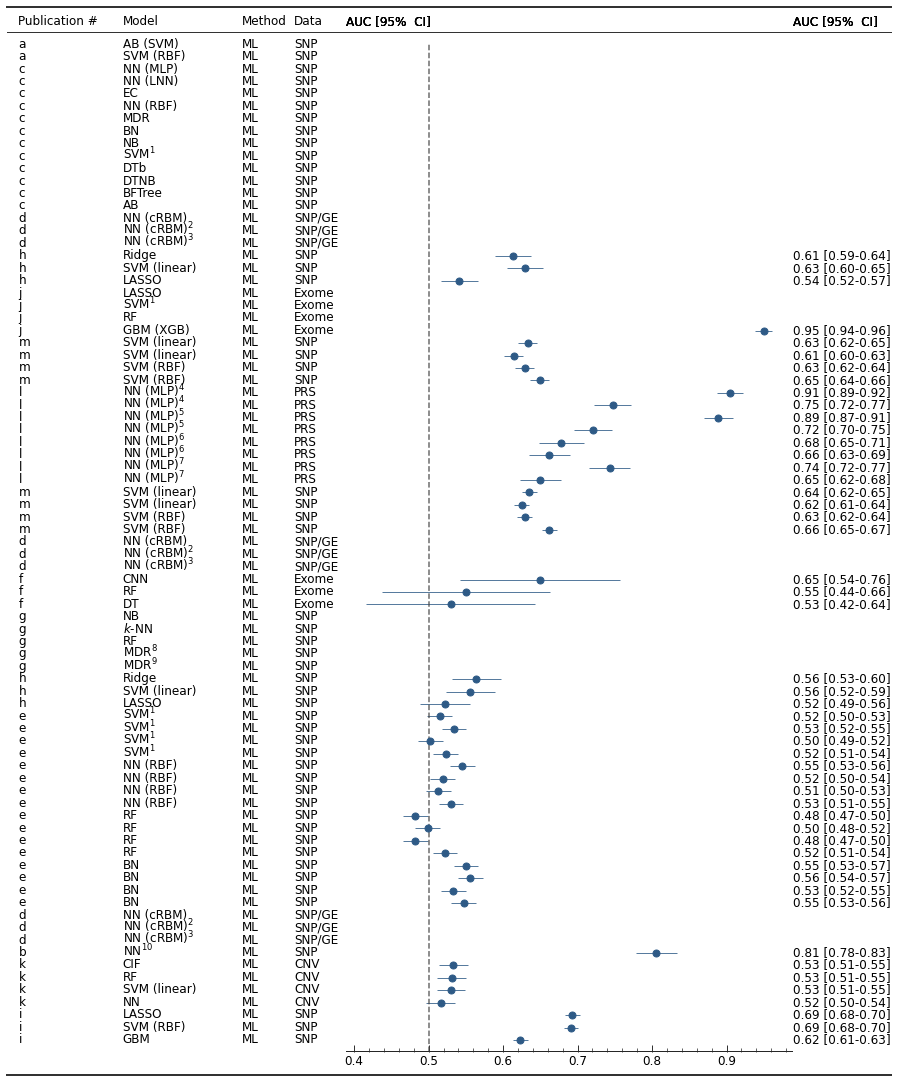

In [165]:
# adjusting the annotated columns to be closer together
annot = ['Publication #', 'Model', 'Method', 'Data', 'AUC']
fig, ax = forest_plot(df, to_annotate=annot, auc_col='AUC', se_col='AUC_se',
                      add_legend=False, anot_base=0.08, annot_offset=7)

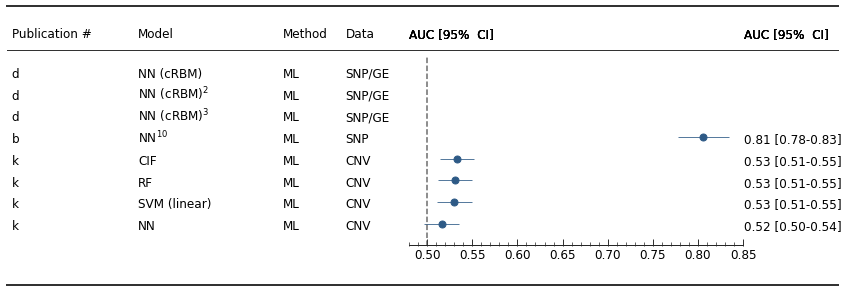

In [174]:
# custom figure size and table bars for smaller number of observations
figsize=(8, 12)
annot = ['Publication #', 'Model', 'Method', 'Data', 'AUC']
asd = df.loc[df['Disorder'] == 'ASD', :].copy()
fig, ax = forest_plot(asd, to_annotate=annot, auc_col='AUC', se_col='AUC_se',
                      add_legend=False, anot_base=0.08, annot_offset=7, fig_shape=figsize,
                      hbar_lim=(-1.2, 1.28))